## Importing Libraries

In [125]:
import pandas as pd
import seaborn as sns
import numpy as np
from ggplot import *
from sklearn.impute import KNNImputer
import missingno as mno
from scipy.stats import mstats
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings("ignore")

## Processing the Data

In [89]:
df1 = pd.read_csv("diabetes.csv")

In [90]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Converting Data to a Nullity Matrix

In [91]:
# Converting all Data that is 0.0 to NaN
def convert_to_NAN(dataset):
    for column in dataset:
        dataset.loc[dataset[column] == 0.0, column] = np.NAN
    return dataset

In [92]:
# Taking out Pregnancy and Outcome column
df1_P_O = df1[['Pregnancies', 'Outcome']]

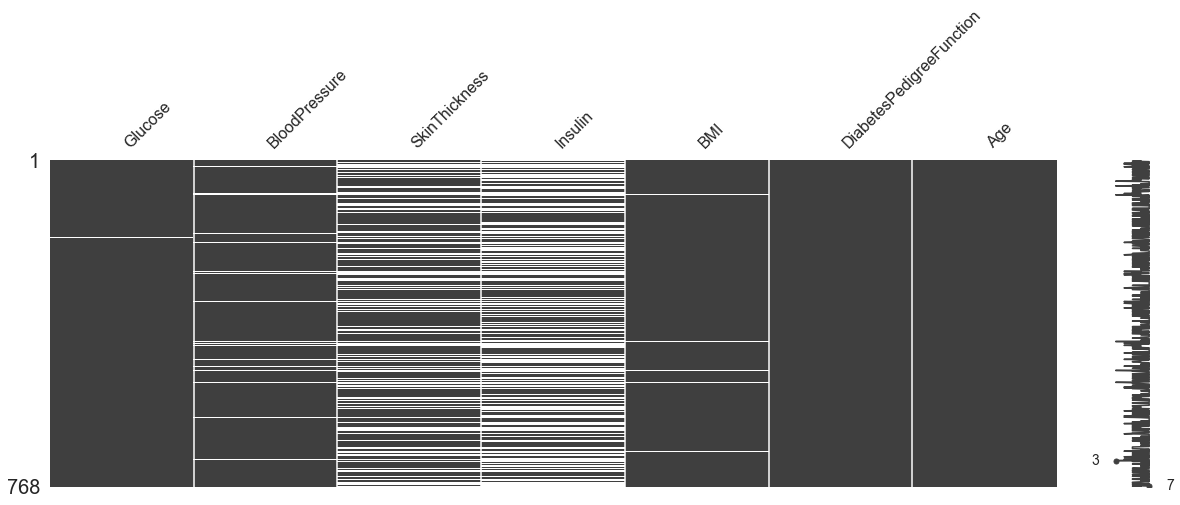

In [93]:
df2 = df1.iloc[: , 1:-1] #Removing Pregnancy and Outcome
df3 = convert_to_NAN(df2)
mno.matrix(df3, figsize = (20, 6))

## Winsorization

In [94]:
# Using scipy.stats.mstats.winsorize 
# The 5% of the lowest value and the 5% of the highest values are replaced.
df4 = pd.DataFrame(mstats.winsorize(df1["BMI"], limits = [0.05,0.05])) 
df4 = df4.rename({0: 'BMI'}, axis = 1) #Change Column Name

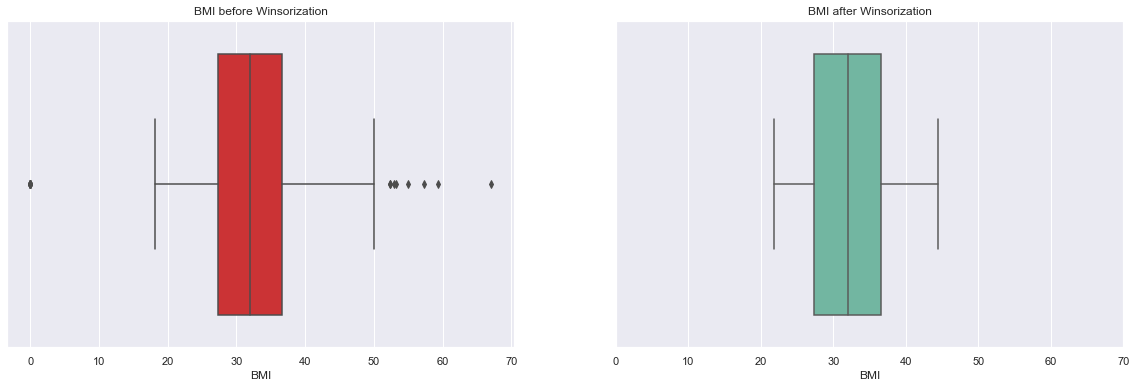

In [95]:
# Visualizing a Box Plot before and after Winsorization
sns.set(rc={'figure.figsize':(20,6)}) 
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True) #Put 2 Plots side by side
plt1 = sns.boxplot(x = df1['BMI'], palette = "Set1", ax = ax1).set(title='BMI before Winsorization')
plt2 = sns.boxplot(x = df4['BMI'], palette = "Set2", ax = ax2).set(xlim=(0, 70),title='BMI after Winsorization')

## K-Nearest Neighbors (Using KNNImputer Function)

In [98]:
# Getting back the original dataset with Pregnancies and Outcome Columns
df4 = pd.concat([df1_P_O, df3], axis=1, join="inner")
df4.describe()

,Pregnancies,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000
mean,3.845052,0.348958,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,3.369578,0.476951,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,0.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000
50%,3.000000,0.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,1.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000
max,17.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [99]:
# Initializing KNNImputer
imputer = KNNImputer(n_neighbors = 5, weights = 'distance', metric = "nan_euclidean")
# Perform the Imputation
df5 = pd.DataFrame(imputer.fit_transform(df4))
df5.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.348958,121.589646,72.379995,29.119900,153.458340,32.430164,0.471876,33.240885
std,3.369578,0.476951,30.513820,12.206163,9.450134,98.692969,6.885260,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,0.000000,99.000000,64.000000,23.000000,88.000000,27.500000,0.243750,24.000000
50%,3.000000,0.000000,117.000000,72.000000,29.000000,133.925044,32.064765,0.372500,29.000000
75%,6.000000,1.000000,140.250000,80.000000,35.000000,189.913787,36.600000,0.626250,41.000000
max,17.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Visualizing the Data for different Neighbours

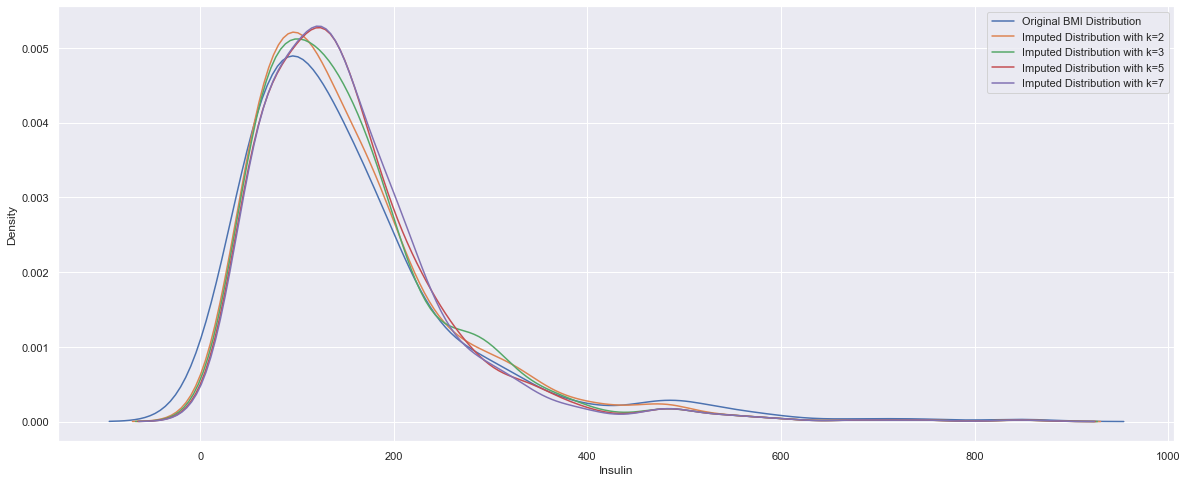

In [109]:
df6 = df4.copy()
# Creating an Array of different k (Neighbors)
n_neighbors = [2, 3, 5, 7]

fig, ax = plt.subplots(figsize=(20, 8))
# Plot the original distribution
sns.kdeplot(df4["Insulin"], label="Original BMI Distribution")
# Plotting the various KNN Imputation
for k in n_neighbors:
    knn_imp = KNNImputer(n_neighbors=k, weights = 'distance', metric = "nan_euclidean")
    df6.loc[:, :] = knn_imp.fit_transform(df4)
    sns.kdeplot(df6["Insulin"], label=f"Imputed Distribution with k={k}")

plt.legend()

## Multiple Imputation (Using IterativeImputer)
- Using ExtraTreesRegressor Variant
- Using BayesianRidge Variant

In [134]:
# Using ExtraTreesRegressor Variant

df7 = df4.copy()
# Initializing IterativeImputer
multiple_imputer = IterativeImputer(estimator = ExtraTreesRegressor(n_estimators=10, random_state=0),
                                    # sample_posterior = True,
                                    max_iter = 10,
                                    imputation_order = 'ascending',
                                    min_value = 0.0)
## Important: Do note that ExtraTreesRegressor() does not support return_std in its predict method.
## You will get an Error Message - TypeError: predict() got an unexpected keyword argument 'return_std'

# Perform the Imputation
df8 = pd.DataFrame(multiple_imputer.fit_transform(df7))
df8.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.348958,121.719792,72.386458,28.931380,155.706120,32.414766,0.471876,33.240885
std,3.369578,0.476951,30.568227,12.180371,9.679458,100.537329,6.898326,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,0.000000,99.000000,64.000000,22.000000,88.000000,27.475000,0.243750,24.000000
50%,3.000000,0.000000,117.000000,72.000000,29.000000,134.950000,32.050000,0.372500,29.000000
75%,6.000000,1.000000,141.000000,80.000000,35.800000,195.425000,36.600000,0.626250,41.000000
max,17.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [131]:
# Using BayesianRidge Variant

df9 = df4.copy()
# Initializing IterativeImputer
multiple_imputer_2 = IterativeImputer(estimator = BayesianRidge(),
                                    sample_posterior = True,
                                    max_iter = 10,
                                    imputation_order = 'ascending',
                                    min_value = 0.0)

# Perform the Imputation
df10 = pd.DataFrame(multiple_imputer_2.fit_transform(df7))
df10.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.348958,121.871389,72.565638,28.771842,163.024753,32.373641,0.471876,33.240885
std,3.369578,0.476951,30.668951,12.398496,10.545349,111.093560,6.952431,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,1.642906,0.000000,18.200000,0.078000,21.000000
25%,1.000000,0.000000,99.000000,64.000000,21.000000,84.202665,27.400000,0.243750,24.000000
50%,3.000000,0.000000,117.000000,72.000000,29.000000,139.652050,32.050000,0.372500,29.000000
75%,6.000000,1.000000,141.000000,80.000000,36.000000,213.441054,36.600000,0.626250,41.000000
max,17.000000,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000
